## Explicación del código Circuito RLC.

Un circuito RLC forma un oscilador armónico de corriente y resuena de forma similar a un circuito LC. Además, la introducción de la resistencia respecto al circuito LC provoca un aumento de la caída de estas oscilaciones, lo que también se conoce como amortiguación. Para simular esa resonancia desacelerada de un ciorcuito RLC, creamos la siguiente clase con los componentes que nos ayudan a visualizar este fenómeno teniendo en cuenta las oscilaciones que pueden genarse en él y el tipo de amortiguación que puede tener. 


Circuito RLC con Resistencia=5 Ω, Inductancia=0.1H, Capacitancia=0.001 F 


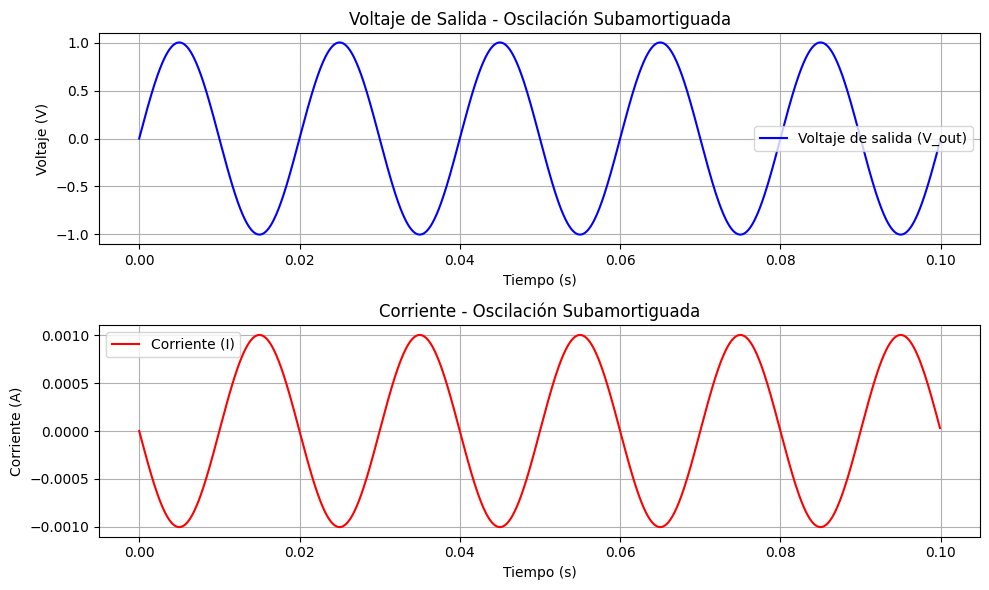

Circuito RLC con Resistencia=20 Ω, Inductancia=0.1H, Capacitancia=0.001 F 


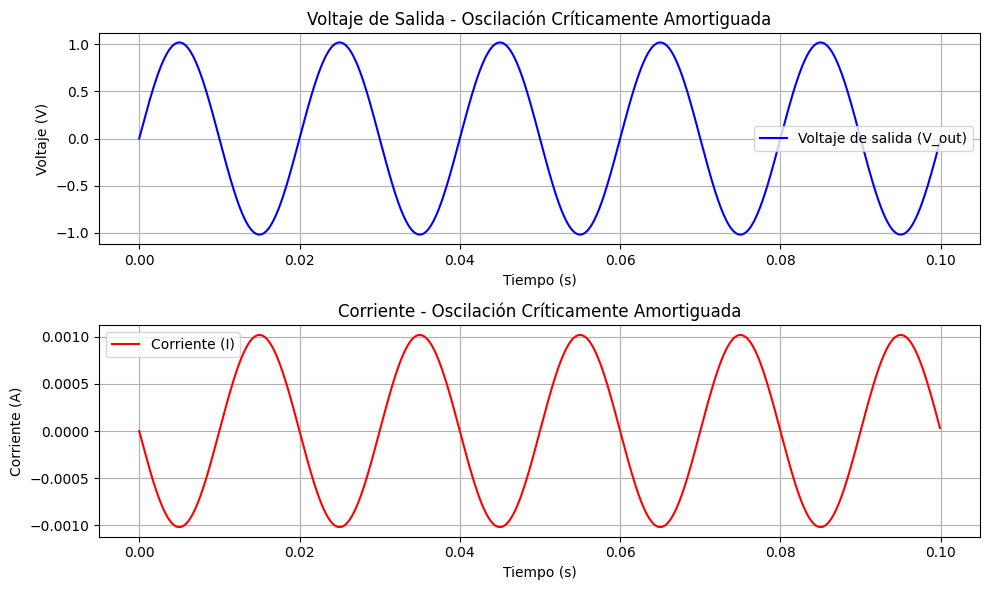

Circuito RLC con Resistencia=40 Ω, Inductancia=0.1H, Capacitancia=0.001 F 


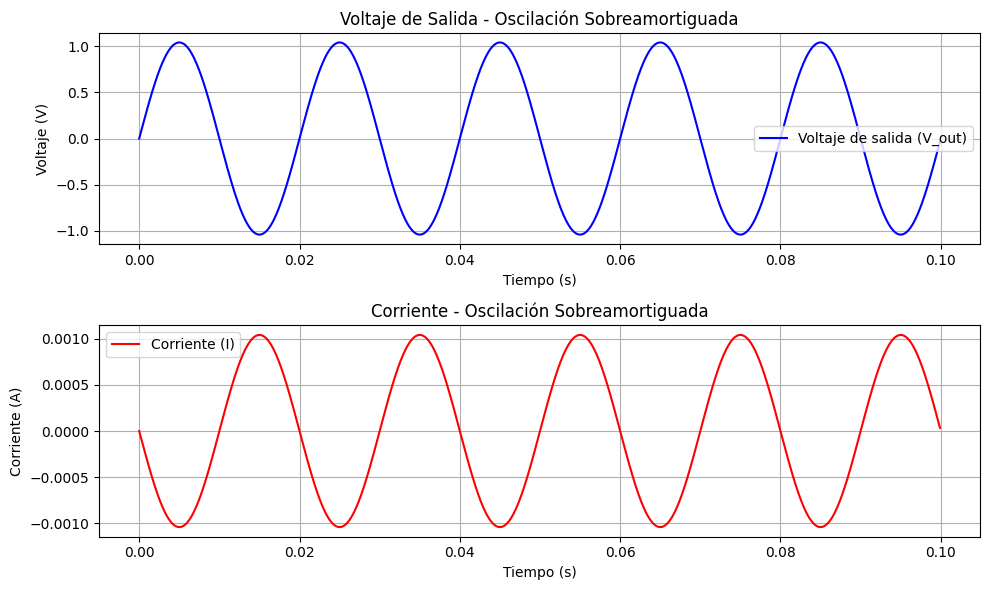

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

class RLCircuito:
    def __init__(self, R, L, C, V_in):
        self.R=R
        self.L=L
        self.C=C
        self.V_in=V_in
        self.V_out=0
        self.I=0
        self.history=[]
    def __add__ (self, other):

        """Suma de circuitos RLC en paralelo"""

        Re_q=1/(1/self.R + 1/other.R)
        L_eq= self.L + other.L
        C_eq= self.C + other.C 
        return RLCircuito(Re_q, L_eq, C_eq, self.V_in)
    
    def __mul__ (self, scalar):
        """ Multiplicar los componentes del circuito por un factor escalar """

        return RLCircuito(self.R*scalar, self.L*scalar,self.C*scalar,self.V_in)
    
    def __rmul__ (self, scalar):

        """ Multiplicar los componentes del circuito por un factor escalar ahora desde la derecha """

        return self.__mul__ (scalar)
    
    def __call__(self,t):

        """Evaluar la respuesta del circuito para un tiempo t cualquiera, así obtener el valor de voltaje de salida """

        self.V_out=self.V_in(t)-self.I*self.R
        return self.V_out
    
    def __getitem__(self,componente):

        """Conoce los valores de cada componete y marca error si no proporciona un componente existente"""

        if componente =='R':
            return self.R
        elif componente =='L':
            return self.L
        elif componente == 'C':
            return self.C
        else: 
            raise ValueError("Componente inválido, por favor use 'R', 'L' o 'C'. ")
    def __str__(self):
        return f"Circuito RLC con Resistencia={self.R} Ω, Inductancia={self.L}H, Capacitancia={self.C} F "

    def tipo_oscilador(self):
        """
        Determina el tipo de oscilación basado en los valores de R,L y C.
        Retorna una cadena que describe el tipo de oscilación
        """
        discrimante=self.R**2-4*self.L/self.C

        if discrimante >0:
            return "Oscilación Sobreamortiguada"
        elif discrimante == 0: 
            return "Oscilación Críticamente Amortiguada"
        else:
            return "Oscilación Subamortiguada"
        
    def simular_respuesta_tiempo_euler(self, t_max,dt):
        """ 
        Simula la respues del circuito usadno el método Euler,
        ajustando las ecuaciones para los diferentes tipos de oscilaciones"""

        t= np.arange (0, t_max,dt)
        v_out= np.zeros_like(t)
        i= np.zeros_like(t)
        di_dt= np.zeros_like(t)


        for idx in range (1, len(t)):
            #Voltaje de salida en función del voltaje de entrada y la corriente(ley de ohm)
            v_out[idx] =self.V_in(t[idx])-i[idx-1]*self.R

            #Ecuación diferencial de la corriente según el tipo de amortiguación
            di_dt[idx]=(-v_out[idx]-(i[idx-1]/self.C))/self.L

            # Método de Euler: para actualizar la corriente 
            i[idx]= i[idx-1]+di_dt[idx]*dt

            #Guardar en el historial 
            self.history.append((t[idx],v_out[idx],i[idx]))

        self.V_out=v_out
        self.I=i
        return t, v_out,i
    def graficar_oscilaciones(self, t, v_out,i):
        """ 
        Grafica las oscilaciones del voltaje de salida y la corriente 
        en el tiempo. 
        El tipo de oscilación se determina automáticamente.
        """

        tipo= self.tipo_oscilador() #Identifica el tipo de oscilación
        plt.figure(figsize=(10,6))


        #Gráfica del voltaje de salida 
        plt.subplot(2,1,1)
        plt.plot(t, v_out, label="Voltaje de salida (V_out)", color= "blue")
        plt.title(f"Voltaje de Salida - {tipo}")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Voltaje (V)")
        plt.legend()
        plt.grid(True)

        # Gráfica de la corriente
        plt.subplot(2, 1, 2)
        plt.plot(t, i, label="Corriente (I)", color="red")
        plt.title(f"Corriente - {tipo}")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Corriente (A)")
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# Función de entrada de voltaje: Voltaje sinusoidal
def voltaje_entrada(t):
    return np.sin(2 * np.pi * 50 * t)

# Simulación de varios casos de oscilación
circuitos = [
    RLCircuito(R=5, L=0.1, C=0.001, V_in=voltaje_entrada),  # Subamortiguada
    RLCircuito(R=20, L=0.1, C=0.001, V_in=voltaje_entrada), # Críticamente amortiguada
    RLCircuito(R=40, L=0.1, C=0.001, V_in=voltaje_entrada)  # Sobreamortiguada
]

t_max = 0.1
dt = 0.0001

# Simulación y graficado para cada circuito
for circuito in circuitos:
    print(circuito)  # Mostrar los detalles del circuito
    t, v_out, i = circuito.simular_respuesta_tiempo_euler(t_max, dt)
    circuito.graficar_oscilaciones(t, v_out, i)
        
